<a href="https://colab.research.google.com/github/himanshu0108/ML_Alogoritms/blob/main/KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Loading and preparing the data

In [2]:
df = pd.read_csv('/content/diabities.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X=df.drop(['Outcome'],axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y=df['Outcome']

## Spliting the data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Modal using KNN Alogorithm

In [28]:
# Create a K-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=8)  # You can adjust n_neighbors

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

In [29]:
# Predict on the test data
y_pred = knn_classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


## Evaluation

In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

#  classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

# Generate a confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mtx)


Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154

Confusion Matrix:
 [[81 18]
 [21 34]]


## Finding the optimal value of K

In [31]:
#Taking Value of K From 1 to 21
k_values = list(range(1, 21))


In [32]:
#we need follwoing library for Cross Validation
from sklearn.model_selection import cross_val_score

# Initialize an empty list to store mean accuracy scores for each K
mean_accuracy_scores = []

# Loop through each K value
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation and calculate the mean accuracy
    accuracy_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
    mean_accuracy = accuracy_scores.mean()
    mean_accuracy_scores.append(mean_accuracy)


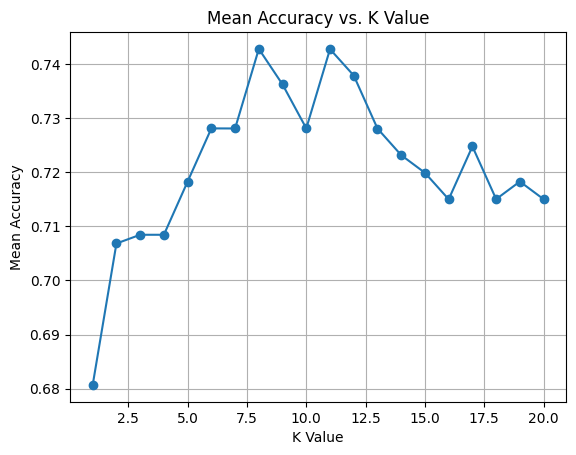

Optimal K value: 8


In [33]:
#Here we are Visualize the Values of K for Better Accuracy
import matplotlib.pyplot as plt

# Plot mean accuracy scores for different K values
plt.plot(k_values, mean_accuracy_scores, marker='o', linestyle='-')
plt.title('Mean Accuracy vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.show()

# Find the K value that maximizes mean accuracy
optimal_k = k_values[mean_accuracy_scores.index(max(mean_accuracy_scores))]
print(f'Optimal K value: {optimal_k}')


In [35]:
#Here we are taking the value of K and test it
final_knn_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
#Train the modal on optimal value of K
final_knn_classifier.fit(X_train, y_train)
#predicting the value
y_pred = final_knn_classifier.predict(X_test)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
# You can also generate a classification report and confusion matrix

print(f'Final K-NN Model Accuracy (K={optimal_k}): {accuracy:.2f}')


Final K-NN Model Accuracy (K=8): 0.75
